## EDA: CORRELARION

Let's load the wine set and display the correlation between the two columns.
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [85]:
from scipy.stats import pearsonr
from sklearn.datasets import load_wine
import seaborn as sns

In [86]:
# Load wine dataset
wine = load_wine(as_frame=True)
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [87]:
# Select features to compare
X1 = 'total_phenols'
X2 = 'od280/od315_of_diluted_wines'

<AxesSubplot:xlabel='total_phenols', ylabel='od280/od315_of_diluted_wines'>

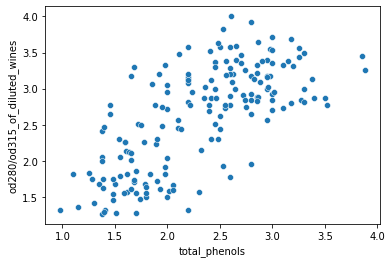

In [88]:
# Visualize correlation
sns.scatterplot(
    data=wine.data,
    x=X1,
    y=X2
)

In [89]:
# Compute Pearson's correlation
xs, ys = wine.data[X1], wine.data[X2]
correlation, pvalue = pearsonr(xs, ys)
print(correlation)

0.6999493647911863


## DE-CORRELATION

To begin with, using PCA, we can perform decorrelation.

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [91]:
model = PCA()

In [92]:
# Apply the fit_transform method of the model to grains:
pca_features = model.fit_transform(wine.data)

In [93]:
# Assign 5th column of pca_features: xs
xs_2 = pca_features[:,5]

In [94]:
# Assign 11th column of pca_features: ys
ys_2 = pca_features[:,11]

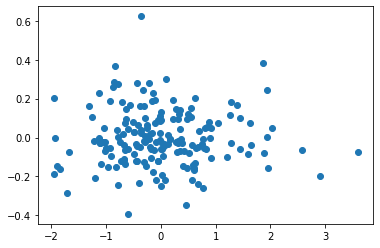

In [95]:
# Scatter plot xs vs ys
plt.scatter(xs_2, ys_2)
plt.show()

In [96]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs_2, ys_2)

In [97]:
# Display the correlation
print(correlation)

-5.778797579347739e-17


In [98]:
xs = pca_features[:,1]
ys = pca_features[:,2]

In [99]:
correlation, pvalue = pearsonr(xs, ys)
print(correlation)

-2.9110828331235794e-16


## Feature Importance

After getting rid of the correlation, we can start reducing dimensions (the lossy method). We need to find out how many minimum parameters a dataset needs to be correctly recognized.

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
# Create scaler: scaler
scaler = StandardScaler()

In [102]:
# Create a PCA instance: pca
pca = PCA()
pipline = make_pipeline(scaler, pca)

In [103]:
# Fit the pipeline to 'samples'
pipline.fit(wine.data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

Text(0, 0.5, 'variance')

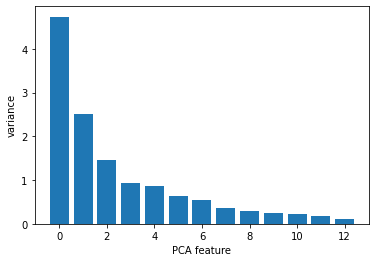

In [104]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')

## Dimension Reduction

Moving on to dimension reduction, when defining the PCA model we must specify the number of components we want to include, i.e. three in our case.

In [105]:
from mpl_toolkits.mplot3d import Axes3D

In [106]:
scaler = StandardScaler()
scaler.fit(wine.data)
scaled_wine = scaler.transform(wine.data)

pca = PCA(n_components=3)

In [107]:
type(wine.data)

pandas.core.frame.DataFrame

In [108]:
# Fit the PCA instance to the scaled samples
pca.fit(scaled_wine)

PCA(n_components=3)

In [109]:
# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_wine)

In [110]:
# Print the shape of pca_features
print(pca_features.shape)

(178, 3)


C:\Users\merli\AppData\Local\Temp\ipykernel_6360\2073334112.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


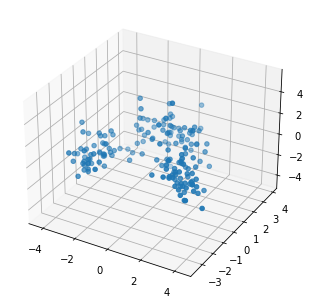

In [111]:
# 3D Visualization
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2])
plt.show()